# Perceptron Learning Algorithm on Different Distribution Data

In [1]:
from sklearn.datasets import make_blobs, make_circles, make_classification, make_moons, make_gaussian_quantiles
from matplotlib import pyplot as plt
import numpy as np

# Create Datasets from Scikit-Learn

In [2]:
samples = 200

datasets = [
    make_blobs(n_samples=samples, centers=2, n_features=2, random_state=1),
    make_blobs(n_samples=samples, centers=2, n_features=2, random_state=6),
    make_moons(n_samples=samples, noise=0.15, random_state=0),
    make_circles(n_samples=samples, noise=0.15, factor=0.3, random_state=0),
    make_gaussian_quantiles(n_samples=samples, n_features=2, n_classes=2, random_state=0),
    make_classification(n_samples=samples, n_features=2, random_state=1, n_redundant=0, n_informative=1, n_clusters_per_class=1),
    make_classification(n_samples=samples, n_features=2, random_state=1, n_redundant=0, n_informative=2, n_clusters_per_class=1),
    make_classification(n_samples=samples, n_features=2, random_state=1, n_redundant=0, n_informative=2),
]

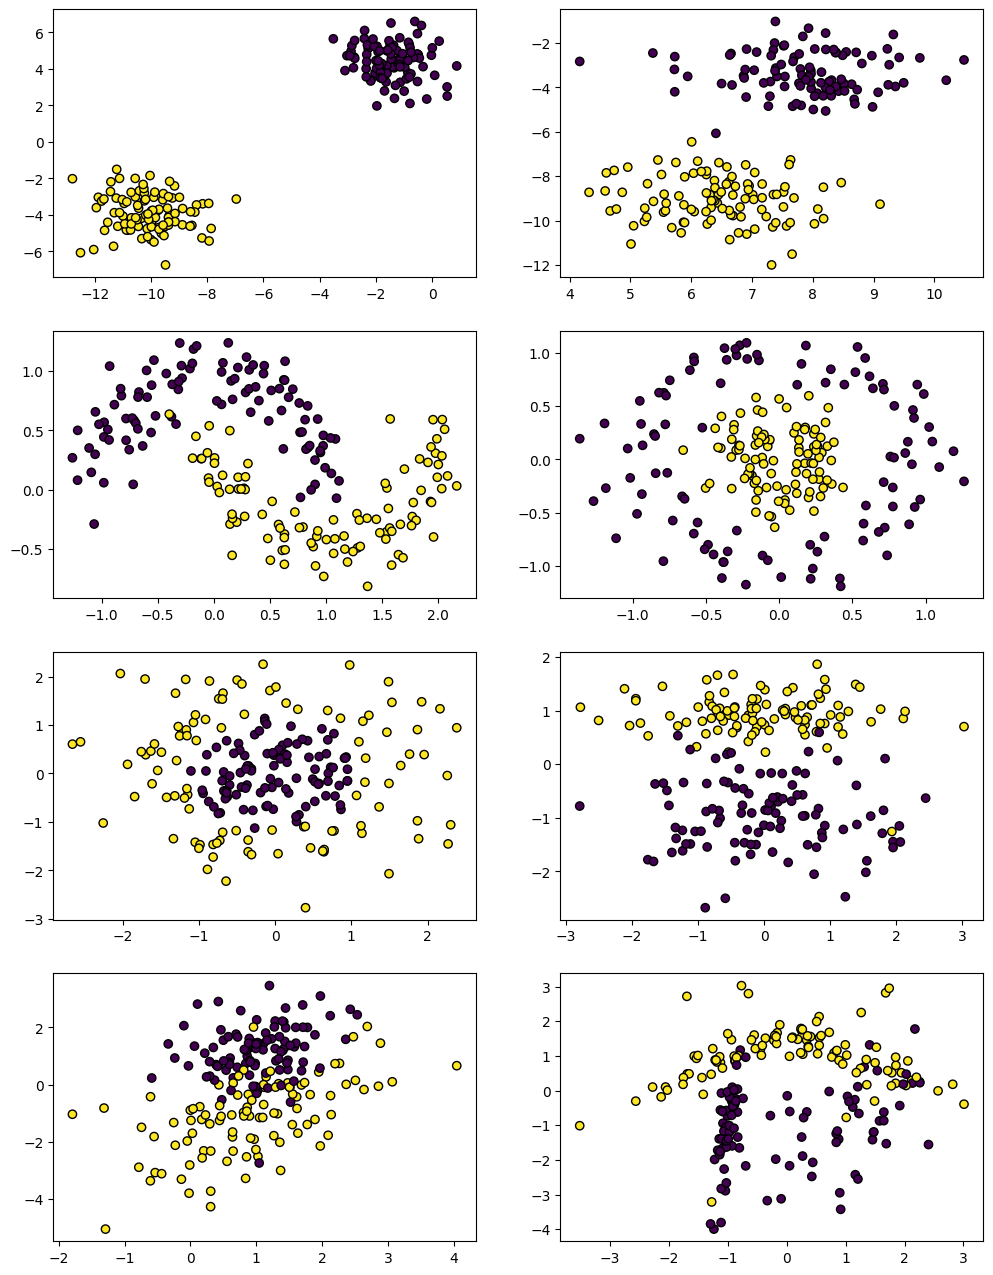

In [3]:
col = 2
row = int(len(datasets)/col)
plt.subplots(row, col, figsize=(12, 16))
for i in range(col):
    for j in range(row):
        X = datasets[row*i+j][0]
        y = datasets[row*i+j][1]
        plt.subplot(row, col, row*i+j+1)
        plt.scatter(X[:,0], X[:,1], c=y, edgecolor="k")

# Build PLA(Perceptron Learning Algorithm) Classifier Model

In [4]:
class PLA:
    def __init__(self, X, label, random=None):
        self.X = X
        self.label = label
        np.random.seed(random)
        w = np.random.random(2)
        self.w = w
        
    def train(self, epoch=100, learning_rate = 0.1):
        for iteration in range(epoch):
            for i in range(len(self.X)):
                if (self.label[i]*(np.dot(self.w.T, self.X[i]))) <= 0:
                    self.w += learning_rate*(self.label[i]*self.X[i])
    
    def sign(self, x):
        if x >= 0:
            return 1
        else:
            return -1
        
    def pred(self, x):
        y_pred = np.array([])
        for i in range(len(x)):
            y_pred = np.append(y_pred, self.sign(np.dot(self.w.T, x[i])))
        return y_pred
    
    def valid(self):
        accuracy = np.sum(self.label==self.pred(self.X))/len(self.X)
        return accuracy
    
    def plot(self):
        #decision_boundary_x = np.arange(np.min(self.X[:,0]), np.max(self.X[:,0])+0.1, 0.1)
        #decision_boundary_y = (-self.w[0]*decision_boundary_x)/self.w[1]
        #plt.plot(decision_boundary_x, decision_boundary_y, color='k')
        interval = np.linalg.norm(np.array([np.max(self.X[:,0])-np.min(self.X[:,0]), np.max(self.X[:,1])-np.min(self.X[:,1])]))/(len(self.X)*1.2)
        x1 = np.arange(np.min(self.X[:,0]), np.max(self.X[:,0])+interval, interval)
        x2 = np.arange(np.min(self.X[:,1]), np.max(self.X[:,1])+interval, interval)
        x1, x2 = np.meshgrid(x1, x2)
        mesh_X = np.array([x1.flatten(), x2.flatten()]).T
        y_ = self.pred(mesh_X)
        
        plt.scatter(mesh_X[:,0], mesh_X[:,1], c=y_, alpha=0.02)
        plt.scatter(self.X[:,0], self.X[:,1], c=y, edgecolor="k")
        #plt.show()
        

# Plot the result

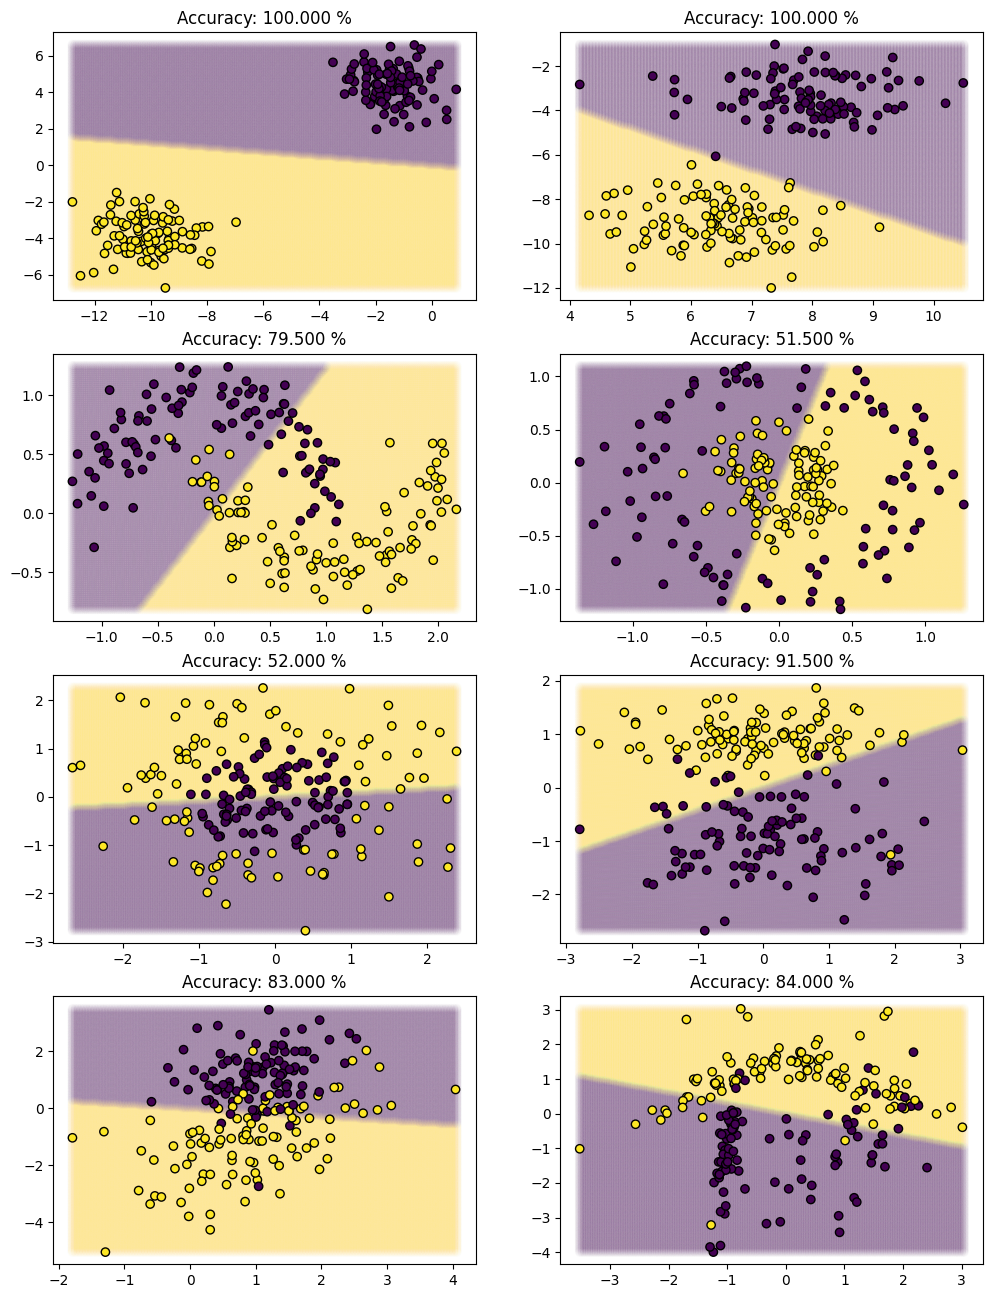

In [5]:
col = 2
row = int(len(datasets)/col)
plt.subplots(row, col, figsize=(12, 16))
for i in range(col):
    for j in range(row):
        X = datasets[row*i+j][0]
        y = datasets[row*i+j][1]
        y[y==0] = -1
        
        plt.subplot(row, col, row*i+j+1)
        model = PLA(X, y, random=0)
        model.train()
        plt.title(f"Accuracy: {model.valid()*100:.3f} %")
        model.plot()